# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.express as px
import cufflinks as cf
import seaborn as sns
cf.go_offline()
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(times):
    solution = []
    for i in range(times):
        solution.append(random.randint(1,6))
    return solution

In [3]:
dice = pd.DataFrame({"cara_dado": dice(10)})


In [4]:
dice

,cara_dado
0,4
1,2
2,3
3,4
4,2
5,5
6,1
7,2
8,4
9,2


#### 2.- Plot the results sorted by value.

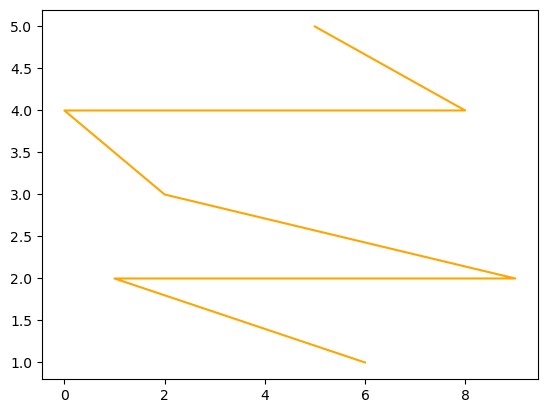

In [5]:
#Doesn't specify the kind of plot...

plt.plot(dice.sort_values(by = "cara_dado"), color = "orange")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
#Calculating frequency distribution?

def frequency(column):
    frequency = {}
    for i in list(column):
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency

In [7]:
frequency(dice["cara_dado"])

{4: 3, 2: 4, 3: 1, 5: 1, 1: 1}

In [8]:
fig = px.bar(dice.sort_values(by = "cara_dado"), title='Resultados del Dado (ordenados por valor)')
fig.update_layout(xaxis=dict(tickmode='linear', tick0=1, dtick=1))
fig

In [9]:
"""

The first one is really confusing but the histogram represents quite good the distribution of frequency. It says
it is the representative chart for that kind of task.

"""

'\n\nThe first one is really confusing but the histogram represents quite good the distribution of frequency. It says\nit is the representative chart for that kind of task.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
#mean

def mean(colum):
    total_sum = colum.sum()
    total_number = colum.count()
    return total_sum / total_number

In [11]:
mean(dice["cara_dado"])

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# Calculating again the frequency distribution:

def frequency(column):
    frequency = {}
    for i in list(column):
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency

In [13]:
freq = frequency(dice["cara_dado"])

In [14]:
freq

{4: 3, 2: 4, 3: 1, 5: 1, 1: 1}

In [15]:
values = [k * v for k, v in freq.items()]
values

[12, 8, 3, 5, 1]

In [16]:
#Calculating mean:

def mean():
    return sum(values) / sum(freq.values())

In [17]:
mean()

2.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [18]:
l = list(dice["cara_dado"])
l

[4, 2, 3, 4, 2, 5, 1, 2, 4, 2]

In [50]:
#median

def median(l):
    sorted_l = sorted(l)
    if len(sorted(l)) % 2 !=0: #Si el número de observaciones es impar, la mediana es la observación del medio.
        m = sorted_l[len(sorted_l) // 2]
    else: #Si es par, la mediana es la media de las dos observaciones que están en el medio.
        m1 = sorted_l[len(sorted(l)) // 2]
        m2 = sorted_l[(len(sorted(l)) // 2) -1]
        m = (m1+m2) / 2
    return m

In [51]:
median(l)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [52]:
l = list(dice["cara_dado"])
l

[4, 2, 3, 4, 2, 5, 1, 2, 4, 2]

In [53]:
lower_half = l[:len(l) // 2]
lower_half
upper_half = l[len(l)//2+1:]
upper_half

[1, 2, 4, 2]

In [54]:
#Quartiles

def quartiles(l):
    sorted_l = sorted(l)
    q2 = median(sorted_l)
    
    lower_half = sorted_l[:len(sorted_l) // 2]
    upper_half = sorted_l[len(sorted_l)//2+1:]
    
    q1 = median(lower_half)
    q2 = median(sorted_l)
    q3 = median(upper_half)
    
    return q1, q2, q3

In [55]:
quartiles(l)

(2, 2.5, 4.0)

In [56]:
#To corroborate:

dice.describe()

,cara_dado
count,10.000000
mean,2.900000
std,1.286684
min,1.000000
25%,2.000000
50%,2.500000
75%,4.000000
max,5.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [26]:
# your code here

In [27]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [28]:
# your code here

#### 3.- Now, calculate the frequency distribution.


In [29]:
# your code here

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [30]:
# your code here

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [34]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [35]:
# your code here

In [36]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [37]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [38]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [39]:
# your code here

In [40]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [41]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [42]:
# your code here

In [43]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [44]:
# your code here

In [45]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [46]:
# your code here

In [47]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [48]:
# your code here

In [49]:
"""
your comments here
"""

'\nyour comments here\n'